# Read in the data from Charles El Mir and output to "raw"

*The data are from [this article](https://www.sciencedirect.com/science/article/pii/S001910351830349X?via%3Dihub).*

*I will have to downsample considerably...*


In [27]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import csv

from matplotlib import pyplot as plt
from matplotlib import animation
from ipywidgets import *

### Get the total number of objects in all files

*The number of particles decreases as the time increases, but it's always around 1M.  We want about 1M objects total.  So the fraction that we will use in each file is about 1/Nfiles.*

In [28]:
fs = os.listdir()
files = []
nfiles = 0
for f in fs:
    if ('csv' in f):
        files.append(f)
#print(files)
nfiles = len(files)
frac = 2./nfiles #* 0.1 #to speed up everything for testing
print(frac)        


0.014925373134328358


### Grab a list of IDs from the first file

In [29]:
f = 'grav.000000000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
time = float(f[5:14])
df = df.assign(time=time)
dfSample = df.sample(frac=frac)
print(dfSample.shape)
print(dfSample)

(15177, 7)
              ID             x             y             z  color    damage  \
343143  343143.0  -2900.003090 -10700.011401   -500.000533    3.0  0.131290   
105101  105101.0  -8500.009057   2900.003090  -4700.005008    5.0  0.171505   
871763  871763.0   4700.005008  -3700.003942   -700.000746    3.0  0.125815   
927621  927621.0   9700.010335    700.000746   6900.007352    3.0  0.133862   
900907  900907.0   5300.005647  -2300.002451   3100.003303    3.0  0.140148   
959254  959254.0   4700.005008   5300.005647  -4100.004368    3.0  0.129471   
960254  960254.0   7100.007565   4700.005008  -7900.008417    2.0  0.183214   
518705  518705.0   2900.003090    900.000959    700.000746    2.0  0.200000   
263688  263688.0 -10300.010974   6100.006499   4900.005221    3.0  0.129220   
705251  705251.0   2500.002664   4900.005221   4900.005221    2.0  0.200000   
341080  341080.0    500.000533  -5300.005647   -900.000959    3.0  0.145367   
212993  212993.0  -5100.005434   4900.005

### Read through all the files, and only keep the rows that match these IDs

*I'm trying to match the IDs here to speed up the process and avoid issues matching points at later time steps.*

In [45]:
dfOut = pd.DataFrame()
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
ID = []
time = []
damage = []
for i,f in enumerate(files):
    if (i < len(files)-1):
        df = pd.read_csv(files[i], header=None, names=['ID','x1','y1','z1','color','damage'])
        df2 = pd.read_csv(files[i+1], header=None, names=['ID','x1','y1','z1','color','damage'])
        
        t = float(f[5:14])
        
        dfUse = df.loc[df['ID'].isin(dfSample['ID'].values)]

        Nlost = 0
        for j, row in dfUse.iterrows():
            sameID = df2.loc[(df2['ID'] == row['ID'])]
            r,c = sameID.shape
            if (r > 0):
                x1.append(row['x1'])
                y1.append(row['y1'])
                z1.append(row['z1'])
                x2.append(sameID['x1'].values[0])
                y2.append(sameID['y1'].values[0])
                z2.append(sameID['z1'].values[0])
                ID.append(row['ID'])
                time.append(t)
                damage.append(row['damage'])
            else:
                Nlost += 1

        
        print(f, dfUse.shape, len(ID), Nlost)

grav.000000000.csv (15177, 6) 15163 14
grav.000001000.csv (15163, 6) 30314 12
grav.000002000.csv (15151, 6) 45444 21
grav.000003000.csv (15130, 6) 60551 23
grav.000004000.csv (15107, 6) 75630 28
grav.000005000.csv (15079, 6) 90670 39
grav.000006000.csv (15040, 6) 105657 53
grav.000007000.csv (14987, 6) 120585 59
grav.000008000.csv (14928, 6) 135431 82
grav.000009000.csv (14846, 6) 150160 117
grav.000010000.csv (14729, 6) 164788 101
grav.000011000.csv (14628, 6) 179313 103
grav.000012000.csv (14525, 6) 193736 102
grav.000013000.csv (14423, 6) 208051 108
grav.000014000.csv (14315, 6) 222259 107
grav.000015000.csv (14208, 6) 236374 93
grav.000016000.csv (14115, 6) 250408 81
grav.000017000.csv (14034, 6) 264366 76
grav.000018000.csv (13958, 6) 278255 69
grav.000019000.csv (13889, 6) 292083 61
grav.000020000.csv (13828, 6) 305858 53
grav.000021000.csv (13775, 6) 319574 59
grav.000022000.csv (13716, 6) 333236 54
grav.000023000.csv (13662, 6) 346864 34
grav.000024000.csv (13628, 6) 360465 27


## Write to "raw" file


In [46]:
dt = 1000.
csvfile = open("asteroid.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(ID)):
    csvwriter.writerow([x1[i], y1[i], z1[i], 
                        x2[i], y2[i], z2[i],
                        time[i], damage[i], ID[i]])
csvfile.close()

## Plot the files

<IPython.core.display.Javascript object>


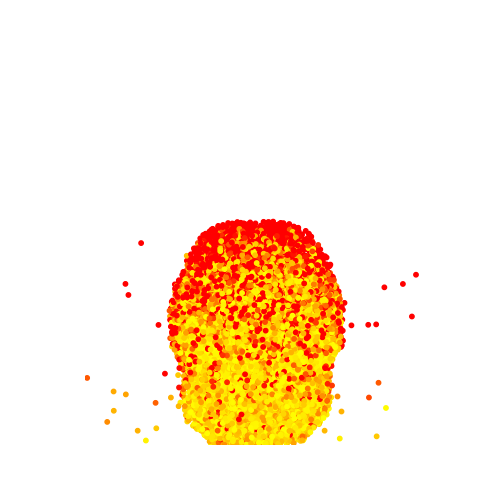

interactive(children=(FloatSlider(value=0.0, description='t', max=132000.0), Output()), _dom_classes=('widget-…

<function __main__.update_plot(t=0)>

In [47]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])
times = np.sort(np.array(list(set(df['time'].values))))
dt = np.diff(times)[0]
#print(times)
#print(dt)

dfUse = df.loc[df['time'].values == times[0]]

fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x1'].values, dfUse['y1'].values, s=10, 
                c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
plt.axis('off')


def update_plot(t=0):
    
    tFrac = (t % dt)/dt
    dfUse = df.loc[(df['time'].values >= t) & (df['time'].values < t+dt)]
    x = dfUse['x1'].values + (dfUse['x2'].values - dfUse['x1'].values)*tFrac
    y = dfUse['y1'].values + (dfUse['y2'].values - dfUse['y1'].values)*tFrac
    # Change the colors.
    scat.set_array(dfUse['damage'].values)
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.c_[x,y])
    #fig.canvas.draw()
    return scat,

interact(update_plot, t = widgets.FloatSlider(value=0, min=min(times),max=max(times),step=0.1))



0.12500027167900002 0.2


<IPython.core.display.Javascript object>


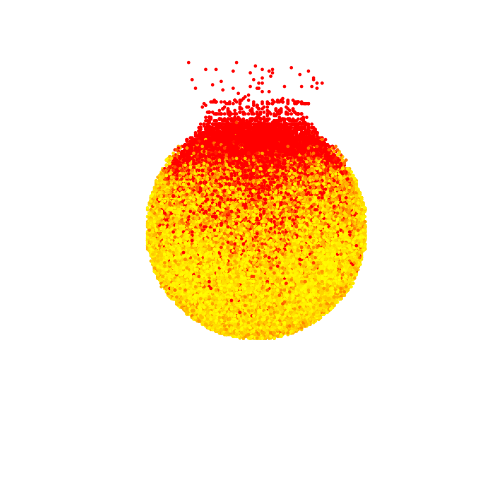

(-20000.0, 20000.0, -25000.0, 20000.0)

In [7]:
i=0
f = files[i]
#f = 'grav.000000000.csv'
#f = 'grav.000092000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
dfUse = df.sample(frac = 0.1)
print(min(dfUse['damage'].values), max(dfUse['damage'].values))
fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x'].values, dfUse['y'].values, s=2, 
                  c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
ax.axis('off')

In [3]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])

In [6]:
distance = []
for i, row in df.iterrows():
    d = ((row['x1'] - row['x2'])**2. + (row['y1'] - row['y2'])**2. + (row['z1'] - row['z2'])**2.)**0.5
    distance.append(d)
df = df.assign(distance=distance)


<IPython.core.display.Javascript object>


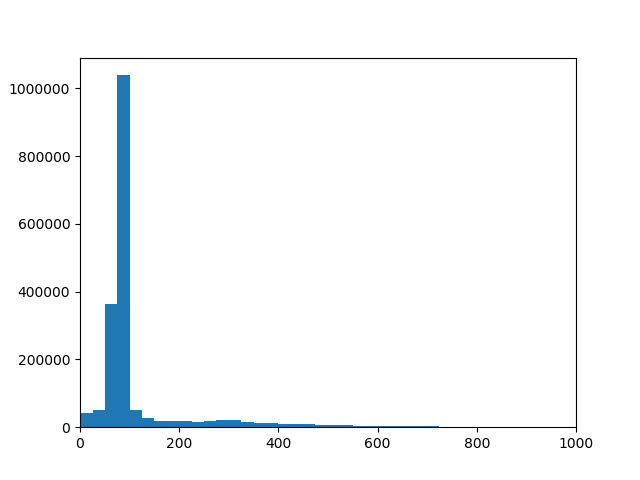

24970.158656570875


(0, 1000)

In [24]:
f,ax = plt.subplots()
ax.hist(df['distance'].values, bins = 1000)
print(max(df['distance'].values))
ax.set_xlim(0,1000)
#ax.set_yscale('log')

18291940 64110


<IPython.core.display.Javascript object>


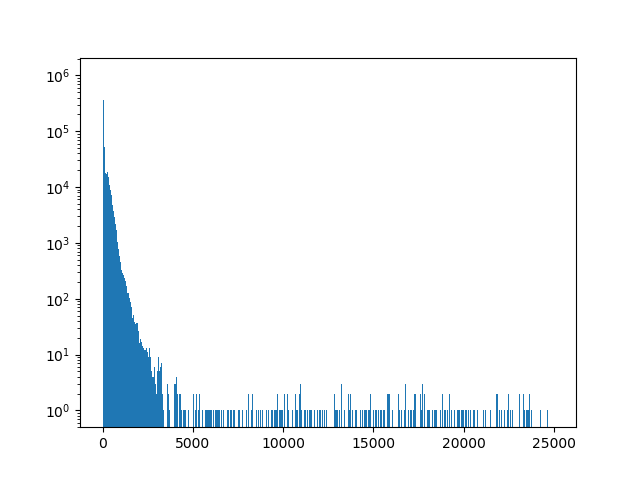

In [25]:
check = df.loc[df['distance'] > 1000]
print(df.size, check.size)

f,ax = plt.subplots()
ax.hist(df['distance'].values, bins = 1000)
ax.set_yscale('log')